# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [184]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [185]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [187]:
df.shape

(1898, 9)

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

The dataset has 1898 rows and 9 columns


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [188]:
# checking shape of the data
print("There are",df.shape[0],'rows and',df.shape[1],"columns.")

There are 1898 rows and 9 columns.


#### Observations: The Food hub dataset has 1898 rows and 9 columns.each row in this data set is an order placed.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [189]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical columns in the dataset and 4 object type columns.
*   column order_id has integer data type 
*   column customer_id has integer data type 
*   column restaurant_name has object data type 
*   column cuisine_type has object data type 
*   column cost_of_the_order has float data type 
*   column cost_of_the_week has object data type 
*  ** column rating has object data type but it should be integer data type**
*   column food_preparation_time has integer data type 
*   column delivery_time has integer data type 
*   memory usage: 133.6+ KB


















### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [190]:

# Any missing values?
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the food data.


In [191]:
 #check why column rating has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:No, there are no missing values but some rating values are not given.


In [192]:
# checking the count of differnt data types in rating column 
df['rating'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
1893    <class 'str'>
1894    <class 'str'>
1895    <class 'str'>
1896    <class 'str'>
1897    <class 'str'>
Name: rating, Length: 1898, dtype: object

In [193]:
# checking the count of differnt data types in rating column 
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [194]:
# replace missing values 
df['rating']=df['rating'].replace(['Not given'],0)


In [195]:
# lets check the unique values again
df['rating'].unique()

array([0, '5', '3', '4'], dtype=object)

In [196]:
# now changing the data type of rating column to integer 
df['rating'] = df['rating'].astype(int)

In [197]:
# check the data type of column rating has changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


#### Observations:
rating data type has been fixed and missing values are set to 0





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [198]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [199]:
# Checking the statistical summary of the food data

df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,2.659642,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,2.195280,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,0.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,0.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations: Order ID and Customer ID are there for each order

*  There are 1898 orded got placed in which minimum cost of the order is 
4.47 dollars  and maximum cost of order is 35.41 dollars,Average cost is 16.49 dollars and 75% orders are below 22.29 dollars.
*  There are food prepration times between 20 to 35 minutes,Avrage prepration time for food prep time is 27.37 minutes.
*   Fastest delivery time for the order is 15 minutes.






In [200]:
df['food_preparation_time'].mean( )

27.371970495258168

In [201]:
df['food_preparation_time'].max( )

35

In [202]:
df['food_preparation_time'].min( )

20

#### Observations: once the order is placed,for the food to be prepared it takes minimum 20 minutes to 35 minutes maximum and average it takes 27.37 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [203]:
# Number of Orders not rated
df['rating'].value_counts()


0    736
5    588
4    386
3    188
Name: rating, dtype: int64

#### Observations: * There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [204]:
# Making a list of all categorical variables
vari_cols = ['restaurant_name','cuisine_type','day_of_the_week','rating']
# Printing the count of the unique value in each column.
for column in vari_cols:
  print(df[column].value_counts())
  print("_"*100)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
____________________________________________________________________________________________________
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
____________________________________________________________________________________________________
Weekend    1351
Weekday     547
Name: day_of_

Observation: Most of the orders are for American Cusine and least orders are for Vietnamese restaurant.
Maximum orders are not given ratings,
Maximum orders are for Shake Shack and Minimum orders are for Wichcraft


In [205]:
# number of unique restaurants 
df['restaurant_name'].nunique()

178

Observation: There are total 178 unique restaurants.


In [206]:
# number of unique restaurants 
df['customer_id'].nunique()

1200

#### Observation: There are total 1200 unique customers.


In [207]:
# number of unique cuisine_type
df['cuisine_type'].nunique()

14

#### Observation: There are total 14 unique cuisines.

In [208]:
from pandas._libs.tslibs.vectorized import normalize_i8_timestamps
vari_cols = ['restaurant_name','cuisine_type','day_of_the_week','rating']
# Printing the percentage of the unique value in each column.
for column in vari_cols:
  print(df[column].value_counts(normalize=True))
  print("_"*100)

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64
____________________________________________________________________________________________________
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64
_________________

In [209]:
df.corr( )


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.054700,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.009834,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.049531,0.041527,-0.029949
rating,0.054700,0.009834,0.049531,1.000000,0.001156,-0.003888
food_preparation_time,-0.007026,-0.030330,0.041527,0.001156,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.003888,0.011094,1.000000


Observation: There is no strong corelation among the varibles


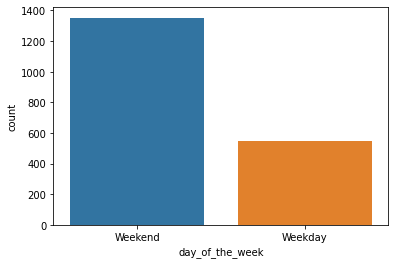

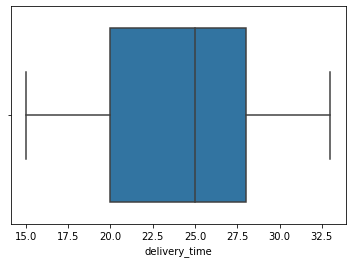

In [210]:
sns.countplot(data=df , x = 'day_of_the_week')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observation: Most orders placed on weekend then weekdays

50 %  orders have delivery time less than 25 minutes

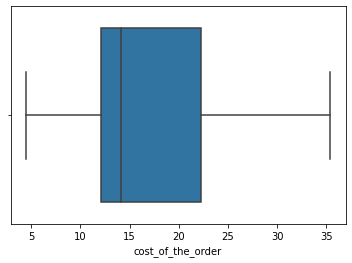

In [211]:

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Observation: Minimum order is for 5 dollars 

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

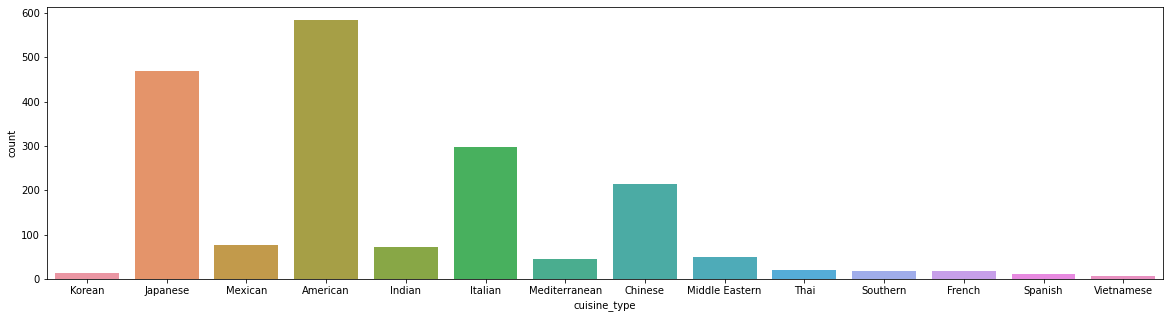

In [212]:
plt.figure(figsize= (20,5))
sns.countplot(data = df,x = "cuisine_type")

Observation: There are only few cuisines gets more orders then the other cuisines

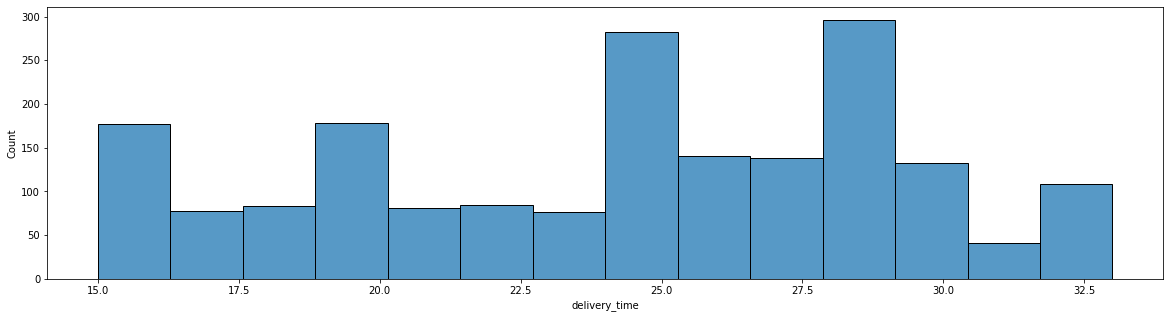

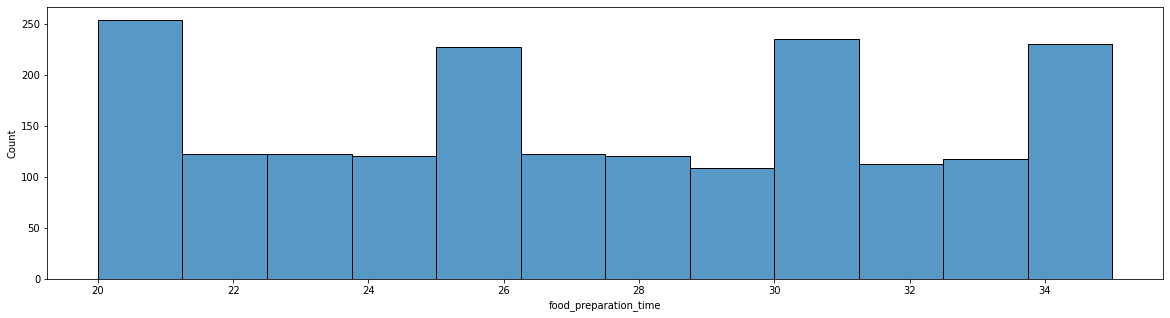

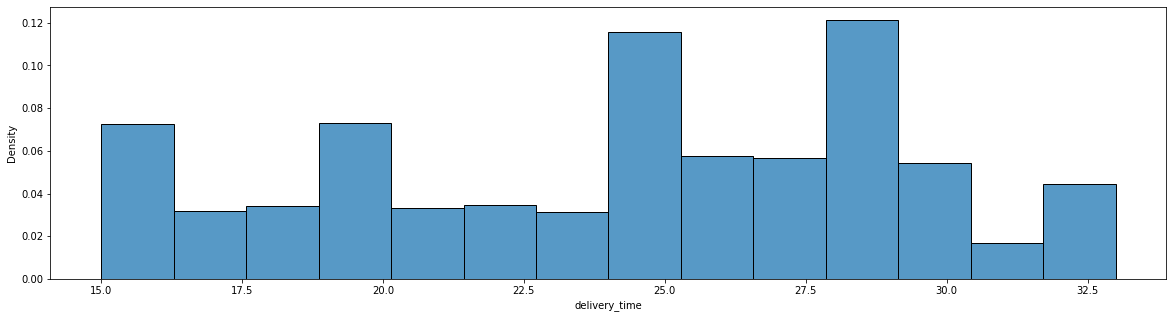

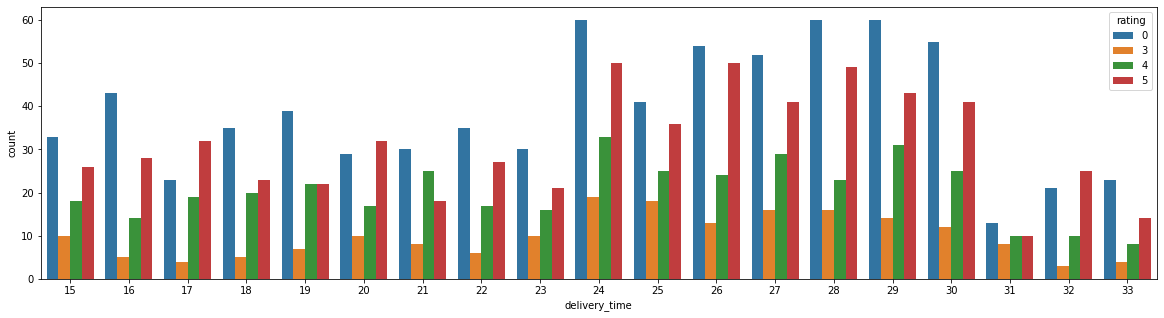

In [213]:
plt.figure(figsize= (20,5))
sns.histplot(data=df,x='delivery_time',stat='count')
plt.show()
plt.figure(figsize= (20,5))
sns.histplot(data=df,x='food_preparation_time',stat='count')
plt.show()
plt.figure(figsize= (20,5))
sns.histplot(data=df,x='delivery_time',stat='density')
plt.show()
plt.figure(figsize= (20,5))
sns.countplot(data=df,x='delivery_time', hue = 'rating')
plt.show()

Observation: Highest ratings are for the orders delivered between 24 to 28 minutes

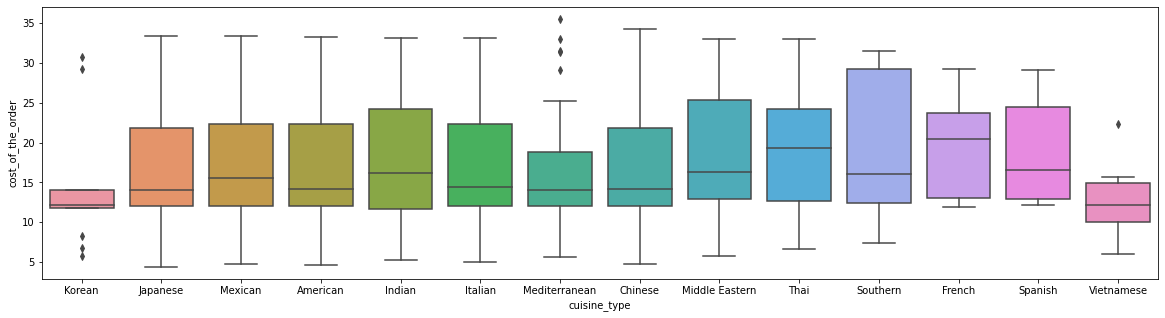

In [214]:
plt.figure(figsize= (20,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order' );
plt.show()

Observation: There are cost outliers for Korean,Meditrranean,vietnamese food

<AxesSubplot:xlabel='rating', ylabel='count'>

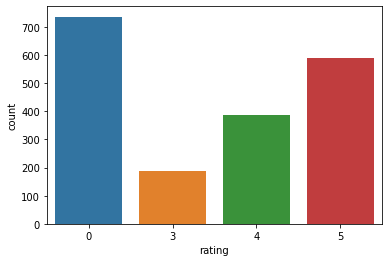

In [215]:
sns.countplot(data = df, x = 'rating')

Observation: There are over 700 orders are not rated 
Max rating is 5

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [216]:
# Counts by restaurants
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [217]:
# Top 5 restaurants
top5_res= df.groupby('restaurant_name').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(5) #top 5 restaurant 
top5_res

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


Observations: The top 5 restaurants that have received most of the orders are the Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [218]:

# most popular cuisine on weekends
df_wknd = df[df['day_of_the_week'] == 'Weekend']
df_wknd ['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [219]:
top5_res= df.groupby('cuisine_type').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(5) #top 5 restaurant 
top5_res

,cuisine_type,order_id
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77


#### Observations:
 Most popular cuisine on weekends is American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [220]:
# Percentage of orders GT 20
df_gt_20=df[df['cost_of_the_order']>20] 
print('No. of orders GT 20: ', df_gt_20.shape[0])

print('Percentage of orders GT 20:' , (df_gt_20.shape[0]/df.shape[0])*100)



No. of orders GT 20:  555
Percentage of orders GT 20: 29.24130663856691


Observations: Number of orders over 20 dollars are 555 and 29.24 percentage of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [221]:
# Mean order Delivery Time
df['delivery_time'].mean()

24.161749209694417

Observations: Mean order delivery time is 24.16 Minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [222]:
top3_cust= df.groupby('customer_id').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(3) #top 3 customer
top3_cust

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9


Observations: Top 3 customers are 52832,47440, 83287 and number of orders they placed are 13,10,9 respectively.

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


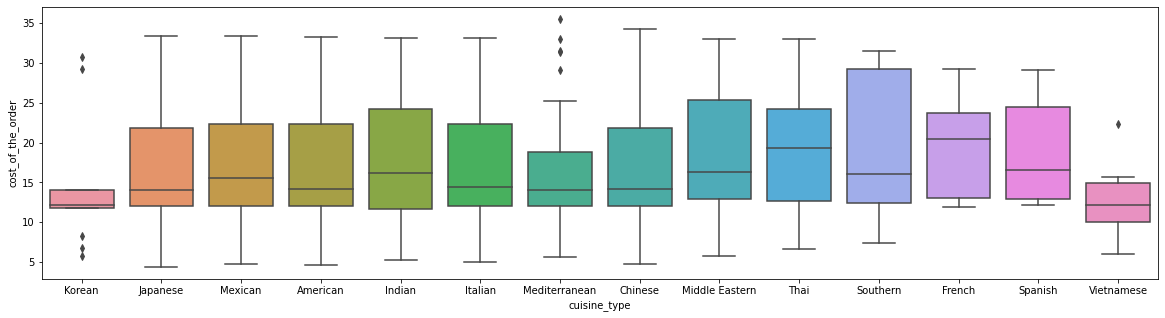

In [223]:
plt.figure(figsize= (20,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order' );
plt.show()

Observations:  There are outliers for Korean, Mediterranean and Vietenamese.
Minimum cost of orders is higher for French and Spanish cusine than the others
50% orders cost less than 20 dollars
Korean cusine min/max wicks are not visible.


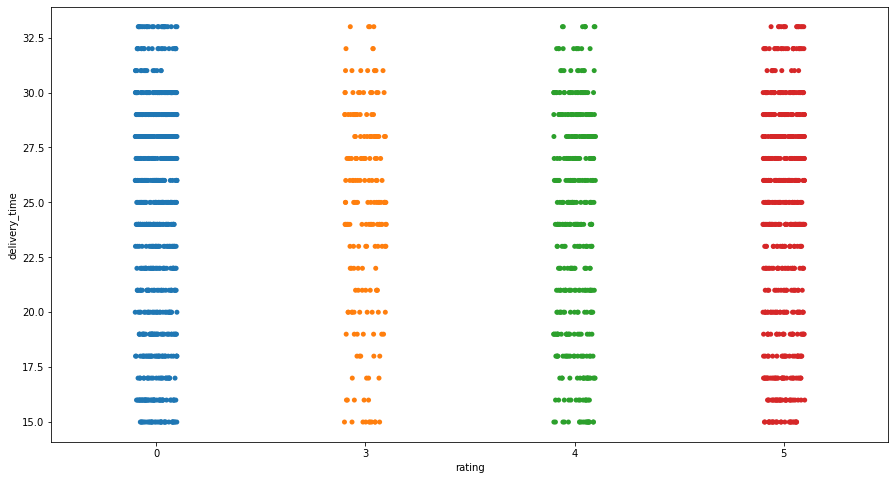

In [224]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x='rating',y='delivery_time',jitter=True);

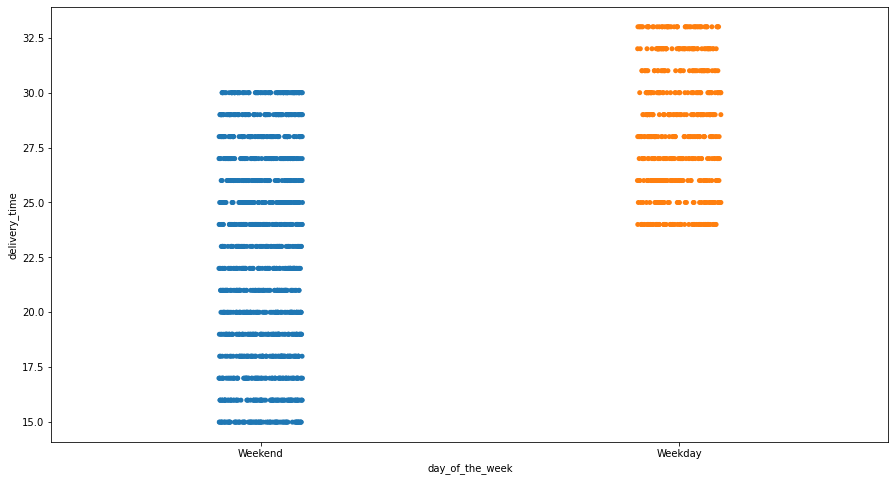

In [225]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x='day_of_the_week',y='delivery_time',jitter=True);

Observations: Delivery time is higher on weekdays.

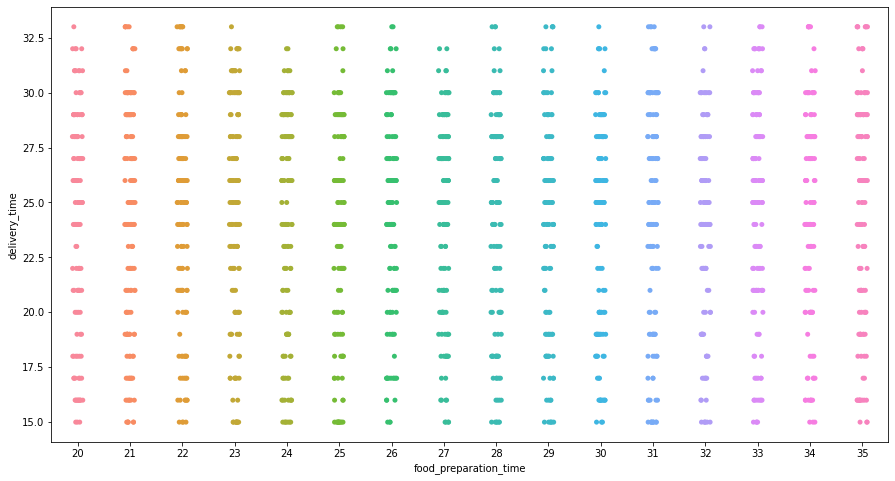

In [226]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x='food_preparation_time',y='delivery_time',jitter=True);

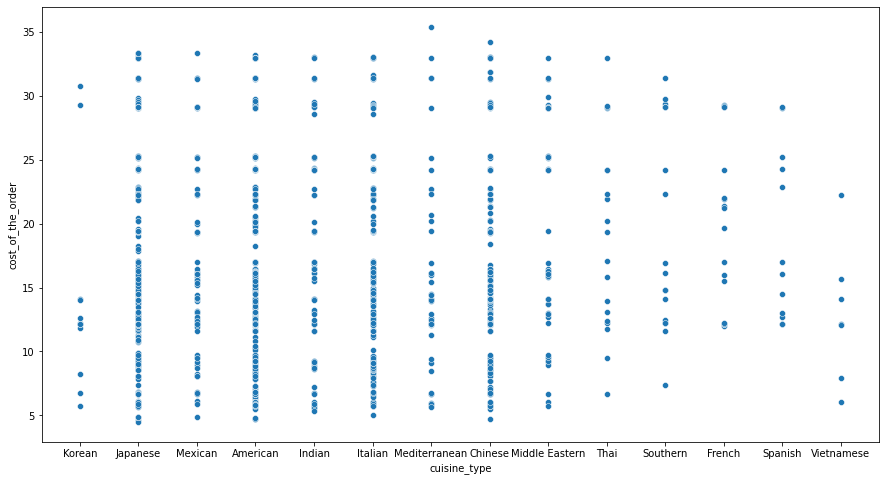

In [227]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,y='cost_of_the_order',x='cuisine_type');

Observations:Korean cuisine does not have orders for the cost between 15 and 27 dollars.

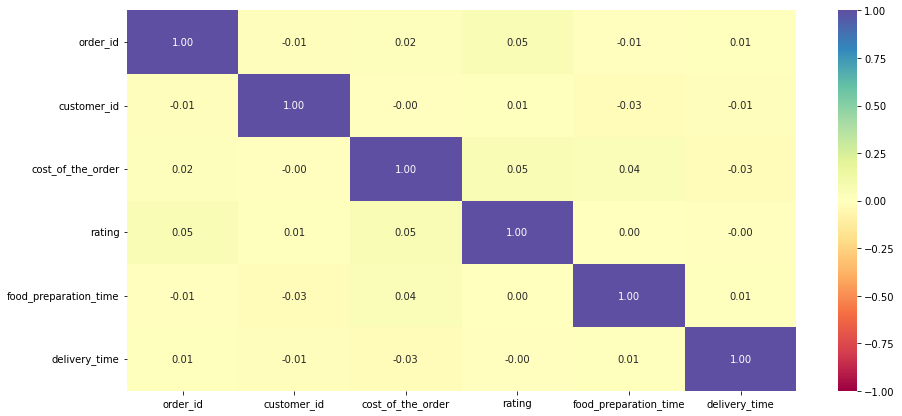

In [228]:
corr = df.corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation: There is no strong corelation among all of the variables.

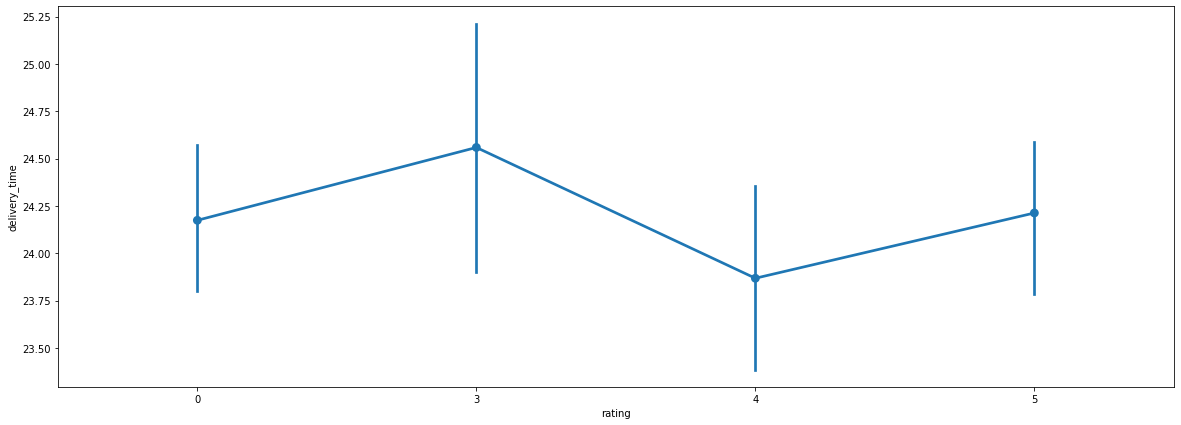

In [229]:
# How delivery time is impacting rating
plt.figure(figsize=(20, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observations: Rating 3 is given to high delivery time orders. Better delivery time has higher ratings in most cases.

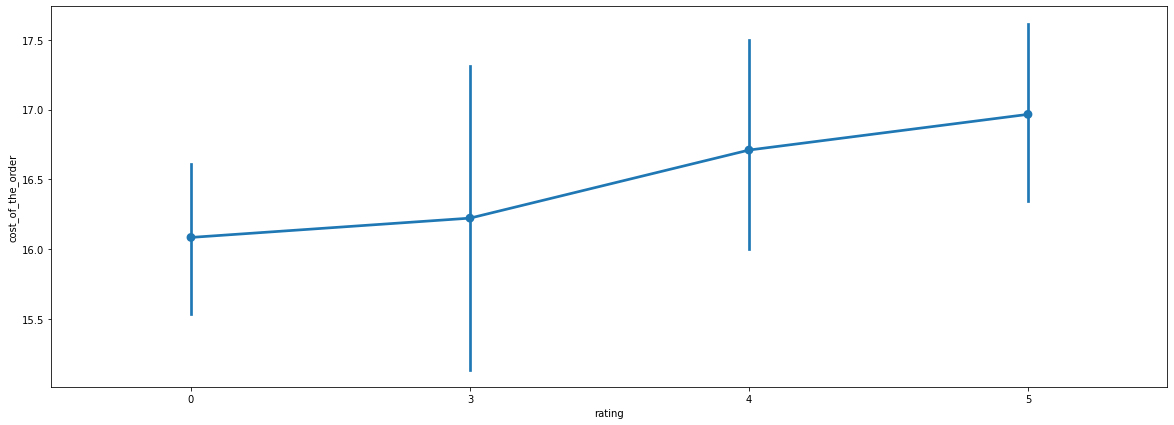

In [230]:
plt.figure(figsize=(20, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

Observations: Higher the cost better the ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [231]:
# Top 5 rated orders
avg_rating = df.sort_values(ascending=False, by='rating').head(5) #display top 5
avg_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
949,1478429,355090,Shake Shack,American,22.85,Weekend,5,24,23
418,1477271,94152,The Meatball Shop,Italian,17.08,Weekday,5,22,26
720,1477365,61181,Shake Shack,American,14.07,Weekend,5,33,25
721,1477266,85422,Saravanaa Bhavan,Indian,24.25,Weekday,5,29,26
723,1478428,53543,The Smile,American,12.18,Weekday,5,29,27


In [232]:
# Data set with rating GT 50
df_GT_0_Rating = df[df['rating'] !='Not given']
df.filter("rating > 0 ")
tot_rating_gt_50 = df_GT_0_Rating.groupby(['restaurant_name'])['rating'].agg(total = "count", avg_rating = "mean",).reset_index()
tot_rating_gt_50
tot_rating_gt_50.query("total > 50 and avg_rating >4") 
# Data set with Avg rating GT 4


,restaurant_name,total,avg_rating


Observations: Qualifying restaurants for promotional offer are 
Blue Ribbon Fried Chicken , Blue Ribbon Sushi, Shake Shack, The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [233]:
# Lets explore the data
# Get names of all the rsetaurant which are 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars

    
df[df['cost_of_the_order']>20] 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,0,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,0,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [234]:
# Lets explore the data
# Orders over 20 dollars
df20 =df[df['cost_of_the_order']>20] 
#df20['revenue']= df20['cost_of_the_order'] 
df20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,0,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,0,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [235]:
df5 = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<20)]  

In [236]:
dfRevenue= pd.concat([df20,df5],axis=0)
dfRevenue


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,0,21,22
...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,0,22,28
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [237]:
 # Use lambda to calculate revenue
 
 df['revenue']= df['cost_of_the_order'].apply(lambda x: x*.25 if x>20 else (x*.15 if x>5 else 0)) 
 df['revenue'].sum()

6166.303

Observations: Total revenue generated by company is 6166.303 dollars.

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [238]:
# Calculate total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [239]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,0,31,24,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270,54


In [240]:
df60 = df[(df['total_time']>60)]  
df60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,0,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,0,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,0,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,0,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [241]:
(df60['order_id'].count()/df['order_id'].count())*100

10.537407797681771

#### Observations:  10.54 % Orders took more than 60 minutes to deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [242]:
# Get the mean delivery time for the day of the week.
df.groupby(['day_of_the_week']).delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: The mean delivery time on weekdays is 28.34 minutes whereas on weekend it's 28.34 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are more orders on weekend than weekdays.
* American cusine has the highest order where as Korean cusine has lowest orders

* Maximum orders are not rated (Over 700 )
* Faster the deliveries, better the ratings.
* Higher the costs, chances are ratings are better.
* Most of the orders are dellivered between 23 and 27 minutes.
* Vietanamese orders have most outliers and gap in the cost.
* There not much correlation among the variables.


### Recommendations:

*  FoodHub should find out the root casue for customers not submitting ratings,should provide promotional offers to the customer if they submit ratings for the orders.
* Find out why there are lowest popularity for the Vietnamese, spanish and Korean cusine.

*American cusine is most popular, offer returning customers some discounts.

* Reduce the delivery time for the weekend since it's the busiest time by employeeing more efficient people.

* provide freebies on weekdays to imporve the orders.
* Use updates on social media to attract more people and record additional data for analysis.
* Encourage people who have given ratings and find out from the people who has given low ratings and pass that to restaurant.

* Any orders taking more than 30 minutes, analyze the delivery route, for the longer route ensure the customer has realistic expectations on delivery time.
* For repeated customer suggest them place the order in advance for the better delivery.
* Get the comments for the delivery person for root causing of teh delay over 30 minutes.

---